**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [4]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


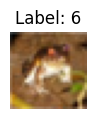

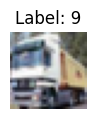

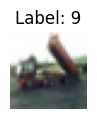

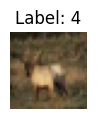

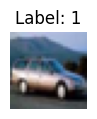

In [8]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
    plt.show()
# Your code to display a few images before the model development.

In [9]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

In [10]:
# Create an MLP model using Keras
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train and evaluate the MLP classifier
mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8605 - accuracy: 0.3303
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6683 - accuracy: 0.4027
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5883 - accuracy: 0.4324
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5392 - accuracy: 0.4497
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5101 - accuracy: 0.4611
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.4806 - accuracy: 0.4727
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4541 - accuracy: 0.4799
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4339 - accuracy: 0.4897
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4190 - accuracy: 0.4922
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [12]:
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 46.05%


In [13]:
# Create a CNN model using Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train and evaluate the CNN classifier
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5463 - accuracy: 0.4349
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1882 - accuracy: 0.5790
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0360 - accuracy: 0.6357
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9377 - accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8637 - accuracy: 0.6990
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8105 - accuracy: 0.7160
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7612 - accuracy: 0.7344
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7183 - accuracy: 0.7487
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6833 - accuracy: 0.7580
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [15]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 69.43%


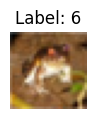

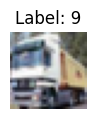

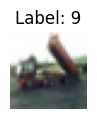

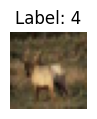

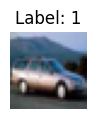

In [16]:
# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [23]:
# @title Default title text
#
#
#
# Your code to do the above activity.
# Hint - Put name of optimizers in a list and use  loops
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
# Hint - Store training time in a list
#
#


import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


def train_model(optimizer, model, X_train, y_train):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    model.fit(X_train, y_train, epochs=10, batch_size=64)
    end_time = time.time()
    training_time = end_time - start_time
    return training_time

optimizers = [SGD(), Adam(), RMSprop()]
training_times = []

for optimizer in optimizers:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    training_time = train_model(optimizer, model, X_train, y_train)
    training_times.append(training_time)

Epoch 1/10
938/938 [==============================] - 47s 49ms/step - loss: 0.7608 - accuracy: 0.7939
Epoch 2/10
938/938 [==============================] - 47s 50ms/step - loss: 0.2167 - accuracy: 0.9339
Epoch 3/10
938/938 [==============================] - 47s 50ms/step - loss: 0.1511 - accuracy: 0.9543
Epoch 4/10
938/938 [==============================] - 48s 51ms/step - loss: 0.1191 - accuracy: 0.9635
Epoch 5/10
938/938 [==============================] - 46s 49ms/step - loss: 0.1002 - accuracy: 0.9697
Epoch 6/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0878 - accuracy: 0.9734
Epoch 7/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 8/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0722 - accuracy: 0.9781
Epoch 9/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 10/10
938/938 [==============================] - 46s 49ms/step - loss: 0.061

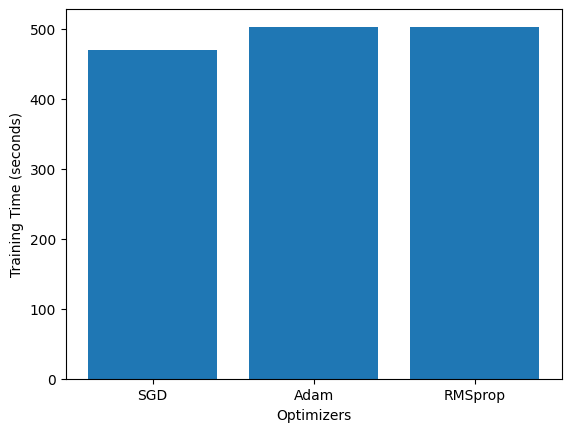

In [30]:
optimizer_names = ['SGD', 'Adam', 'RMSprop']
plt.bar(optimizer_names, training_times)
plt.xlabel('Optimizers')
plt.ylabel('Training Time (seconds)')
plt.show()


In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 0.0371 - accuracy: 0.9902
Test Accuracy: 99.02%


Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.
